In [1]:
import pandas as pd # Import pandas library for data manipulation and analysis
import numpy as np  # Import numpy library for numerical operations
import datetime #import datetime library to manage the date in the database
import plotly.express as px #Import plotly.express library for correlation between the features
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module to enable plotting and visualization. This module provides a MATLAB-like interface for creating a wide variety of plots and charts.
from sklearn.model_selection import train_test_split # Import train_test_split function from sklearn to split data into training and testing sets
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn to use the Linear Regression algorithm for regression 
from sklearn.metrics import mean_squared_error, mean_absolute_error #Import mean_squared_error and mean_absolute_error to evaluate the model
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor from sklearn to use the Decision Tree algorithm for regression 
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor from sklearn to use the Random Forest algorithm for regression
from sklearn import linear_model # Import Linear_model from sklearn to use the Linear Model algorithm for regression 
import seaborn as sns   # Import the seaborn module, a statistical data visualization library built on top of matplotlib that offers a higher-level interface for drawing attractive and informative statistical graphics.
import warnings # Import warnings library to control warning messages
warnings.filterwarnings('ignore') # Suppress all warnings to ensure cleaner output during execution

First of all we saw that some columns has been shrinked, so in two lines we have a extra columns. We have already fixed that directly in Excel.

1) Loading the dataset in order to first understand it

In [2]:
df = pd.read_csv(r"books.csv", encoding='utf-8', sep=',', index_col="bookID")
#importation of the database, encoding to read all the letters and put bookID as the index columns 
df.info() #check the number of value for each features, if there is some null and the datatype of each features
df.head() #have a look to the first raws

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  int64  
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780440000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780440000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780440000000,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780440000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780440000000,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.describe() #describe the integers and floats values 

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.00000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.93330,9.780889e+12,336.376921,1.793644e+04,541.854498
std,0.35438,1.243563e+09,241.127305,1.124794e+05,2576.176608
min,0.00000,9.780001e+12,0.000000,0.000000e+00,0.000000
25%,3.77000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,3.96000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,4.13500,9.780870e+12,416.000000,4.993500e+03,237.500000
max,5.00000,9.789999e+12,6576.000000,4.597666e+06,94265.000000


2) Ensuring that the data is Clean

In [4]:
df.columns = df.columns.str.strip() # Taking away white spaces at the beginning and at the end of the columns names

In [5]:
print(df.isnull().sum()) #we check if there is any Null value

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# converting 'publication_date' into a datatime format
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df.isnull().sum() #There are two dates that didn't convert well

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [8]:
# Checking the indexes of the null values
df[df.publication_date.isna()].index

Index([31373, 45531], dtype='int64', name='bookID')

In [9]:
# replacing the data with original values after searching manually
df.at[31373, 'publication_date'] = '1/10/2000'
df.at[45531, 'publication_date'] = '4/23/1982'
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

3) Prepare the data 

In [10]:
categorical_columns = df.select_dtypes(include=['object', 'datetime']).columns
categorical_unique_values = {col: df[col].nunique() for col in categorical_columns} #checking how many unique value there is in each columns 
categorical_unique_values

{'title': 10352,
 'authors': 6643,
 'isbn': 11127,
 'language_code': 27,
 'publication_date': 3678,
 'publisher': 2292}

In [11]:
df['language_code'].value_counts() #count the number of occurrences of each language

language_code
eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [12]:
df['language_code'] = df['language_code'].apply(lambda x: 'eng' if 'en-' in x else x) #merge all the english languages
df['language_code'].value_counts()

language_code
eng    10541
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
nl         1
ara        1
srp        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: count, dtype: int64

In [13]:
#We have try several possibility here to see which one is the best (no merging, less than 2, less than 10 ...)
counts = df['language_code'].value_counts() 
df['language_code'] = df['language_code'].apply(lambda x: 'others' if counts[x] < 20 else x) #merge all the language that have less than 20 occurences
df['language_code'].value_counts()

language_code
eng       10541
spa         218
fre         144
ger          99
others       79
jpn          46
Name: count, dtype: int64

In [14]:
df_langues = pd.get_dummies(df['language_code'], prefix='lang') # Use get_dummies to create columns for each languages category and put lang in front of each value
df_langues = df_langues.astype(int) # Convert boolean values in integer (0,1)
df = pd.concat([df, df_langues], axis=1) # Add the new columns 

In [15]:
#Create 3 new columns for the year, the month and the day of publication and one for the year since the publication of the book
df['year'] = df['publication_date'].dt.year
df['month'] = df['publication_date'].dt.month
df['day'] = df['publication_date'].dt.day
current_year = pd.to_datetime('now').year
df['years_since_publication'] = current_year - df['publication_date'].dt.year

In [16]:
# Count the number of author and publisher for each book
df['num_authors'] = df['authors'].apply(lambda x: len(x.split('/')))
df['num_publishers'] = df['publisher'].apply(lambda x: len(x.split('/')))

In [17]:
# Create new columns with the number of occurence of the author, publisher and title for each book throught the entire database
df['author_popularity'] = df['authors'].str.split('/').explode().map(df['authors'].str.split('/').explode().value_counts()).groupby(level=0).sum()
df['publisher_popularity'] = df['publisher'].str.split('/').explode().map(df['publisher'].str.split('/').explode().value_counts()).groupby(level=0).sum()
df['title_occurrences'] = df['title'].map(df['title'].value_counts())
df['title_occurrences'].value_counts()

title_occurrences
1    9865
2     686
3     222
4     124
5     100
6      66
8      32
9      18
7      14
Name: count, dtype: int64

In [18]:
df = df.drop(columns=['isbn','isbn13']) # drop isbn and isbn13 columns because they didn't have any interesting informations
df = df.drop(columns=['language_code']) #drop the language_code column that we have serparate into new columns
df = df.drop(columns=['publication_date']) #drop the publication_date column that we have serparate into new columns
df = df.drop(columns=['title','authors','publisher']) #drop the title, autor and publisher columns 
df = df.drop(columns=['num_authors','num_publishers']) #drop the number of authors and publishers in each book

In [19]:
df

,average_rating,num_pages,ratings_count,text_reviews_count,lang_eng,lang_fre,lang_ger,lang_jpn,lang_others,lang_spa,year,month,day,years_since_publication,author_popularity,publisher_popularity,title_occurrences
bookID,,,,,,,,,,,,,,,,,
1,4.57,652,2095690,27591,1,0,0,0,0,0,2006,9,16,18,31,13,2
2,4.49,870,2153167,29221,1,0,0,0,0,0,2004,9,1,20,31,13,1
4,4.42,352,6333,244,1,0,0,0,0,0,2003,11,1,21,25,34,2
5,4.56,435,2339585,36325,1,0,0,0,0,0,2004,5,1,20,31,13,2
8,4.78,2690,41428,164,1,0,0,0,0,0,2004,9,13,20,31,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,512,156,20,1,0,0,0,0,0,2004,12,21,20,10,21,1
45633,4.08,635,783,56,1,0,0,0,0,0,1988,12,1,36,8,262,1
45634,3.96,415,820,95,1,0,0,0,0,0,1993,8,1,31,8,262,1


4) Analyzing the data 

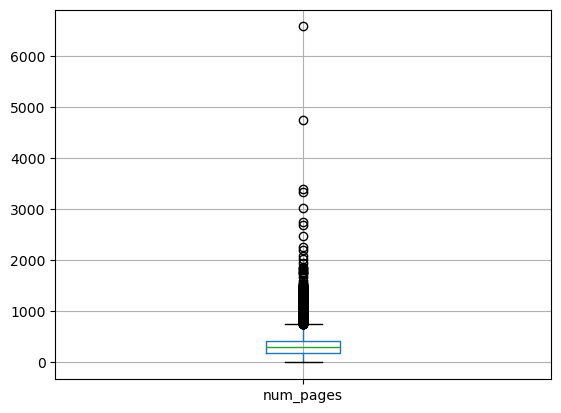

In [20]:
# Visualize outliers using box plots for numerical column 'num_pages'
df.boxplot(column=['num_pages']) 
plt.show()

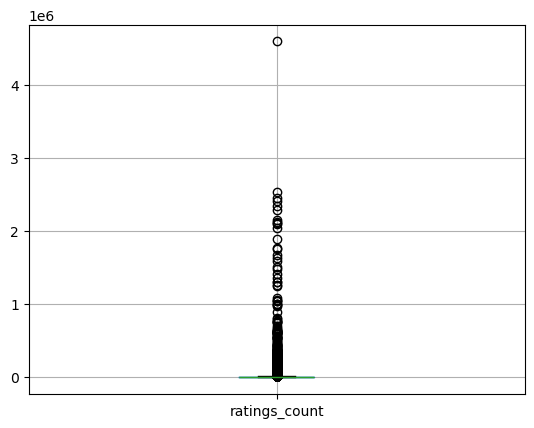

In [21]:
# Visualize outliers using box plots for numerical column 'ratings_count'
df.boxplot(column=['ratings_count']) 
plt.show()

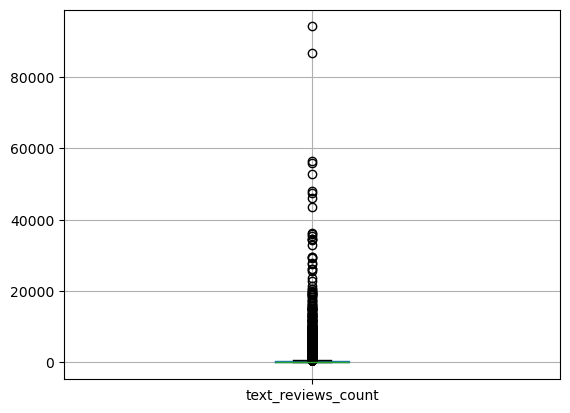

In [22]:
# Visualize outliers using box plots for numerical column 'text_reviews_count'
df.boxplot(column=['text_reviews_count']) 
plt.show()

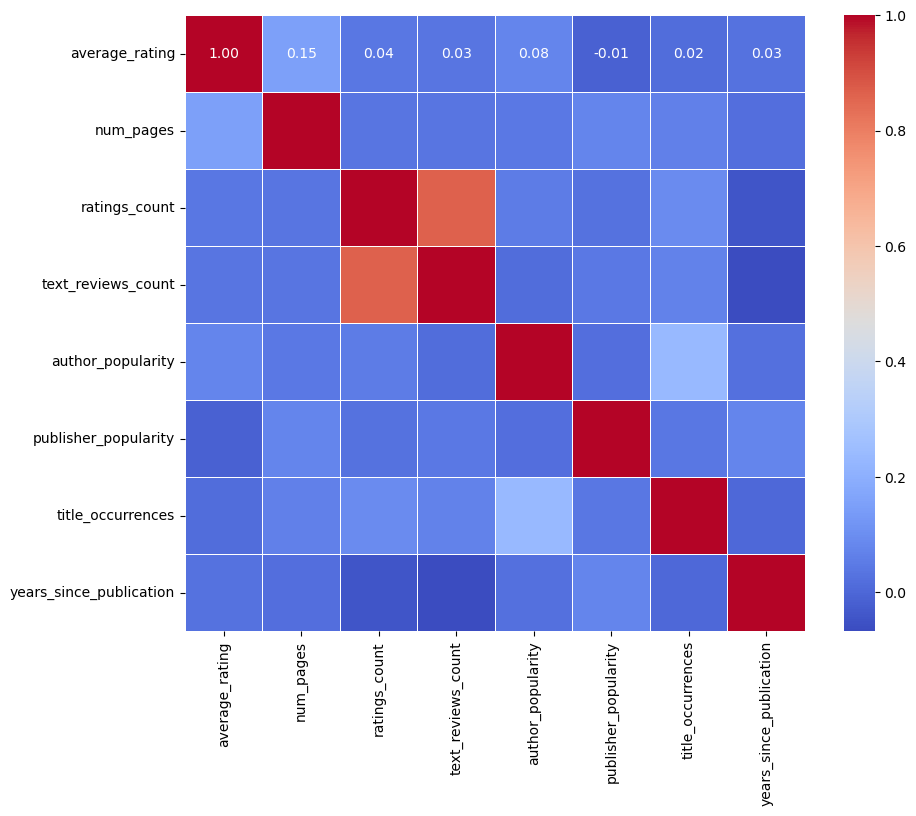

In [24]:
numerical_cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'author_popularity', 'publisher_popularity', 'title_occurrences', 'years_since_publication']
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

5) Training and evaluation of the data 

In [25]:
df_training = df

In [26]:
# Try of several model 
y = df_training[['average_rating']]
X = df_training.drop(columns=['average_rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize different models to see which one is the best 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Lasso": linear_model.Lasso()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}:")
    print("Mean Absolute Error:", mae)
    print("Root Mean Square Error:", rmse)
    print()


Linear Regression:
Mean Absolute Error: 0.22406083437217963
Root Mean Square Error: 0.3190082502869303

Decision Tree:
Mean Absolute Error: 0.3080503144654088
Root Mean Square Error: 0.47204854548044806

Random Forest:
Mean Absolute Error: 0.21179905660377354
Root Mean Square Error: 0.30615710067219337

Lasso:
Mean Absolute Error: 0.2255320757136965
Root Mean Square Error: 0.3207121563955865



What we found here confirm what we have saw in our research.
Indeed, since there is no clear correlations between features, the random forest seems to be the best option.
The random forrest is robust to outliers and noise in the data and we saw that we have some outliers. Also we have many features and random forest can automatically select important features and handle high-dimensional datasets effectively. For these reasons and the result random forrest seems to be the best choice of model.
For the evaluation, we choose MAE. Indeed, MAE directly represents the average magnitude of errors in the same units as the target variable. This makes it easier to interpret and communicate the model's performance.

In [27]:
#Find the best random state 
y = df_training[['average_rating']]
X = df_training.drop(columns=['average_rating']) #separating into one database with the target_feature and one with all the others features

# Define a range of random state values to test
random_states = range(1, 10) #creation of a fonction to test all the random_state betxeen 1 and 1000

best_random_state = None #set the best_random_state variable to None
best_mae = 5 #set the best_mean_absolute_error to 5 (it's the maximum)

# Iterate over random state values
for random_state in random_states:
    # Split the data into training and testing sets using the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using accuracy
    mae = mean_absolute_error(y_test, y_pred)
    
    # Check if the current random state gives better accuracy
    if mae < best_mae:
        best_mae = mae
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best mae:", best_mae)


Best Random State: 8
Best mae: 0.21020125786163524
